<br/><center><font size="16" ><b>Python Convolution</b></font></center>

<img align="center" src="imgs/python.png" width="200"/>

<img src='imgs/cnn_steps_convolution.png' height='800'/>

### 1975 VW Golf Rabbit "Swallowtail"

<table align="left">
    <tr align="center">
        <th>original</th>
        <th>green channel</th>
        <th>convolution</th>
    </tr>
<tr>
    <td><img src='imgs/green_golf.jpg' width='600'/></td>
    <td><img src='imgs/golf_green.png' width='600'/></td>
    <td><img src='imgs/golf_convo.png' width='600'/></td>
    </tr>
</table>


In [62]:
from AI_Decomposed import *

### gather metadata - height, width, channel count

In [63]:
image_file = './imgs/green_golf.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

### split out color channels

In [64]:
save_image(red,width,'red_golf.png')
save_image(green,width,'green_golf.png')
save_image(blue,width,'blue_golf.png')

<table align="left">
    <tr align="center"><th>original</th><th>red channel</th><th>green channel</th><th>blue channel</th></tr>
<tr>
<td><img src="./imgs/green_golf.jpg"/> </td>
<td><img src="./imgs/red_golf.png"/> </td>
<td><img src="./imgs/green_golf.png"/></td>
<td><img src="./imgs/blue_golf.png"/></td>
</tr>
</table>

# convolution
basically, applying a kernel matrix to a larger matrix to create feature map, aka convolution  

![edge](./imgs/convolution_edge_detect.png)

http://timdettmers.com/2015/03/26/convolution-deep-learning/

![animated](./imgs/animated_convolution.gif)

http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html

###  python  convolution example

<img src='imgs/green_golf.jpg' width='400'/>

In [65]:
def apply_kernel(window, filter, i, j):
    sum = 0
    for m in range(len(filter)):
        for n in range(len(filter[m])):
            sum = sum + ((window[i + m][j + n]) * (filter[m][n]))
    return sum

In [67]:
def convolve(matrix, kernel):
    convOut = []
    for i in range(len(matrix) - ((len(kernel)) - 1)):
        r = list()
        for j in range(len(matrix[i]) - ((len(kernel)) - 1)):
            r.append(apply_kernel(matrix, kernel, i, j))
        convOut.append(r)
    return convOut

# kernel

In [68]:
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [69]:
image_file = 'imgs/green_golf.jpg'

# zero padding demo

### In order to lose possible information near the edges of our images, we pad the border with zeroes so as the kernel window slides around our image, the edge pixels will be included in the center of our kernel.

In [70]:
# create flat list
sample = list(range(16))
print(sample)
print()

# convert to matrix
sample_matrix = np.asarray(sample).reshape(4,4)
print(sample_matrix)
print()

# zero pad matrix
sample_padded = np.pad(sample_matrix, 1, 'constant')
print(sample_padded)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[ 0  0  0  0  0  0]
 [ 0  0  1  2  3  0]
 [ 0  4  5  6  7  0]
 [ 0  8  9 10 11  0]
 [ 0 12 13 14 15  0]
 [ 0  0  0  0  0  0]]


# zero pad green channel

In [71]:
# convert to matrix
green_array = np.asarray(green).reshape(height,width)
# add zero pad border
green_padded = np.pad(green_array, 1, 'constant')

# perform convolution

2.61 seconds to convolve  261640  pixel image


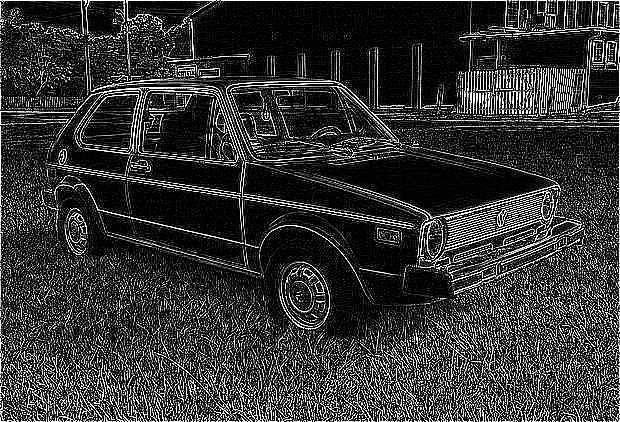

In [72]:
import time
start = time. time()
green_convolved = convolve(green_padded, kernel)
print(round(time.time() - start, 2), 'seconds to convolve ', (width* height),' pixel image')
green_convolved_list = list(np.array(green_convolved).flat)
display_channel(green_convolved_list, width)

# NEXT -  Python Pooling

http://localhost:8888/notebooks/3_Py_Pooling.ipynb

<table align="left">
    <tr align="center"><th>original</th><th>green channel</th><th>convolution</th><th>pooled</th></tr>
<tr>
<td><img src="./imgs/porche_2.jpg"/> </td>
<td><img src="./imgs/green_porche.png"/></td>
<td><img src="./imgs/convoluted_porche.png"/></td>
<td><img src="./imgs/pooled_porche.png"/></td>
</tr>
</table>
